# Aug 30, 2023: mouse whole brain fMRI: correlation maps 

In [1]:
import csv
import os
import numpy as np
import pandas as pd
import scipy as sp 
import pickle 
from os.path import join as pjoin
from itertools import product
from tqdm import tqdm
from copy import deepcopy


# plotting
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.cm import rainbow

plt.rcParamsDefault['font.family'] = "sans-serif"
plt.rcParamsDefault['font.sans-serif'] = "Arial"
plt.rcParams['font.size'] = 14
plt.rcParams["errorbar.capsize"] = 0.5

import cmasher as cmr  # CITE ITS PAPER IN YOUR MANUSCRIPT

# ignore user warnings
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [2]:
class ARGS():
    pass

args = ARGS()

In [3]:
# 1 - len(np.where(np.isnan(ts[0, :]))[0]) / ts.shape[1]

In [4]:
data_path = f"/home/govindas/mouse_dataset/data"

# time series of a session of a subject, concatenating runs
sub, ses, task = 1, 1, 'rest'
data_files = [
    f 
    for f in os.listdir(data_path) 
    if f'SLC{sub:02d}' in f 
    if f'ses-{ses}' in f 
    if f'task-{task}' in f
]
ts = np.concatenate(
    [np.load(f"{data_path}/{data_file}") for data_file in data_files], 
    axis=-1
).T # time x roi
print(ts.shape)

args.TR = 1
t = np.arange(0, ts.shape[0]*args.TR, args.TR)
t.shape

(1971, 6017)


(1971,)

[Text(0.5, 14.79166666666666, 'roi'), Text(48.541666666666664, 0.5, 'time')]

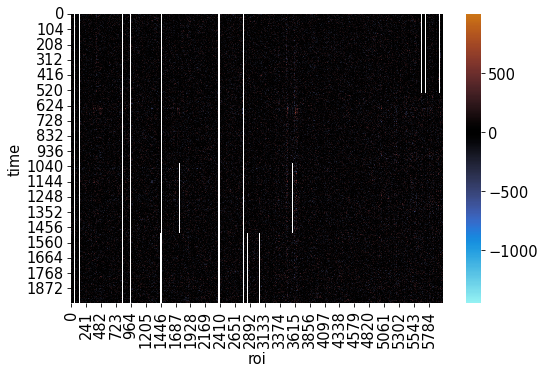

In [5]:
args.cmap = cmr.iceburn
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(8, 5), dpi=75)
ax = axs
sns.heatmap(ts, cmap=args.cmap, ax=ax, center=0)
ax.set(xlabel='roi', ylabel='time')

<AxesSubplot: >

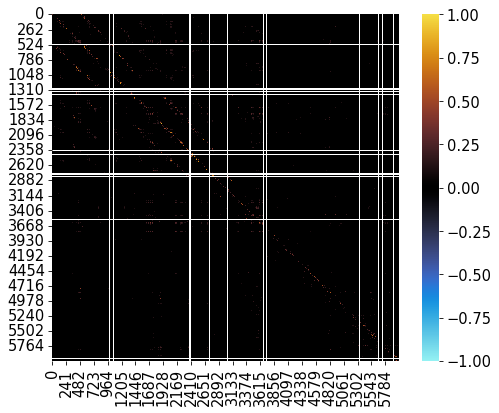

In [6]:
# FC matrix, thresholded at top 10% density
args.density = 99
R = np.corrcoef(ts, rowvar=False)
R -= np.diag(np.diag(R))
R *= R > np.nanpercentile(R, args.density)
args.cmap = cmr.iceburn
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(8, 6), dpi=75)
ax = axs
sns.heatmap(R, vmin=-1, vmax=1, cmap=args.cmap, ax=ax, square=True)

In [7]:
roi_lookup = np.load(f'/home/govindas/mouse_dataset/roi_lookup.npy', allow_pickle=True).item()
roi_idx = [k for k, v in roi_lookup['bold'].items() if v == roi_lookup['ca2'][321]][0]
r = R[roi_idx, :]

[Text(0, 0.5, 'corr'), Text(0.5, 0, 'roi')]

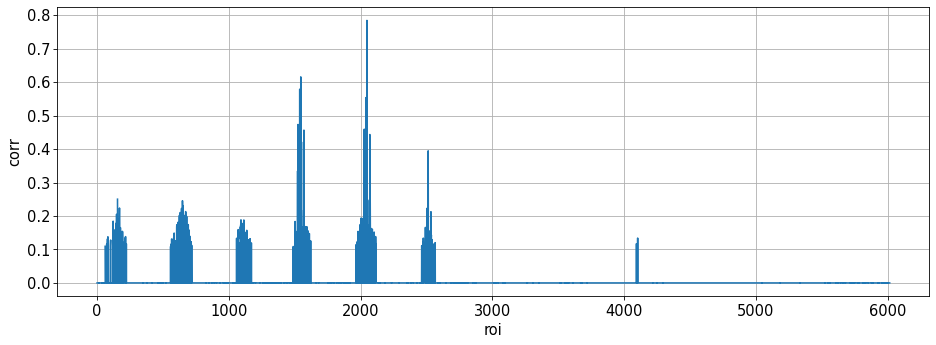

In [8]:
fig, axs = plt.subplots(1, 1, figsize=(15, 5), dpi=75)
ax = axs
ax.plot(r)
ax.grid(True)
ax.set(ylabel='corr', xlabel='roi')

----------------------